In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
x = np.load('time.npz')
ts = x['timings']
n_samples = x['n_samples']

In [ ]:
ts.shape

In [ ]:
for ii in range(ts.shape[1]):
#    plt.figure()
    plt.plot(np.median(ts[0,ii], axis=-1), label=n_samples[ii])
plt.legend()
plt.show()

In [ ]:
for ii in range(ts.shape[1]):
    plt.plot(np.median(ts[1,ii], axis=-1), label=n_samples[ii])
plt.legend()
plt.show()

In [ ]:
for ii in range(2):
    plt.plot(n_samples, np.median(ts[ii,:,0], axis=-1), label=ii)
plt.legend()
plt.show()

In [ ]:

retshape = (2, 3, 5)
nums = np.arange(np.prod(retshape)).reshape(retshape)
for ii, idxs in enumerate(np.ndindex(retshape)):
    print(ii)
    print(idxs)
    iic = ii
    start = 1
    idx2 = []
    for jj in range(len(retshape)):
        start = retshape[::-1][jj]
        idx2.append(iic % start)
        iic = iic // start
    print(idx2[::-1])
    print()

# Distributed

In [10]:
files = list(os.walk('timings/edison'))[0][-1]

In [11]:
n_sample_idxs = []
repeats = []
for f in files:
    split = f.split('_')
    n_sample_idxs.append(int(split[1]))
    repeats.append(int(split[2][0]))
n_sample_idxs = sorted(set(n_sample_idxs))
repeats = sorted(set(repeats))

In [12]:
n_sample_idxs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
repeats

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
data = np.zeros((2, len(n_sample_idxs), 48, len(repeats)))

In [16]:
for f in files:
    ds = np.load(os.path.join('timings/edison', f))
    timings = ds['timings']
    n_samples = ds['n_samples']
    split = f.split('_')
    ii = int(split[1])
    jj = int(split[2][0])
    data[:,ii,:,jj-1] = timings

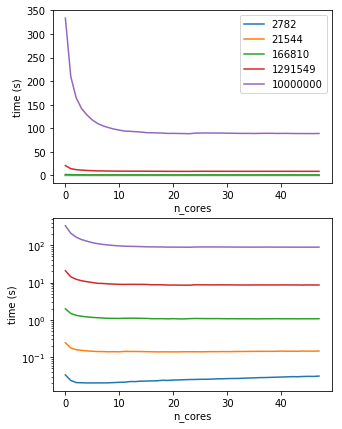

In [18]:
f, axes = plt.subplots(2, figsize=(5,7))
for ii in range(1,data.shape[1], 2):
    for ax in axes:
        ax.plot(np.median(data[0,ii], axis=-1), label=n_samples[ii])
        ax.set_xlabel('n_cores')
        ax.set_ylabel('time (s)')

axes[0].legend()
axes[1].set_yscale('log')
plt.savefig('/home/jesse/Downloads/mi_time_raw.pdf')
plt.show()

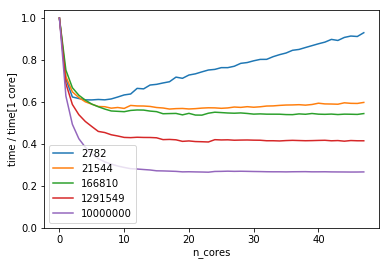

In [21]:
for ii in range(1,data.shape[1], 2):
    plt.plot(np.median(data[0,ii], axis=-1)/np.median(data[0,ii], axis=-1)[0], label=n_samples[ii])
plt.legend()
plt.xlabel('n_cores')
plt.ylabel('time / time[1 core]')
plt.ylim(0, None)
plt.savefig('/home/jesse/Downloads/mi_time_scaled.pdf')
plt.show()

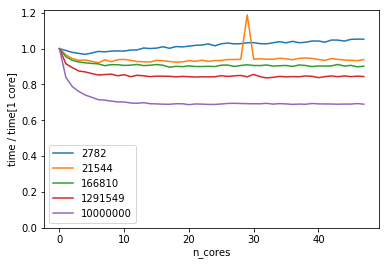

In [22]:
for ii in range(1,data.shape[1], 2):
    plt.plot(np.median(data[1,ii], axis=-1)/np.median(data[1,ii], axis=-1)[0], label=n_samples[ii])
plt.legend()
plt.xlabel('n_cores')
plt.ylabel('time / time[1 core]')
plt.ylim(0, None)
plt.savefig('/home/jesse/Downloads/mi_time_scaled2.pdf')
plt.show()